In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Data Preprocessing and EDA

In [4]:
with open('poland_bankruptcy_data_2009.json', 'r') as file:
    poland_data = json.load(file)

poland_data.keys()

dict_keys(['schema', 'data', 'metadata'])

In [7]:
df = pd.DataFrame().from_dict(poland_data['data']).set_index('company_id')
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   flo

There seem to be missing data in some of the features

## Data Visualization

<AxesSubplot:title={'center':'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

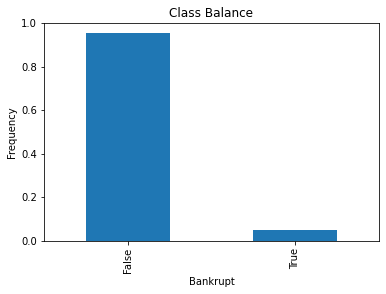

In [9]:
df['bankrupt'].value_counts(normalize=True).plot(
    kind='bar',
    xlabel='Bankrupt',
    ylabel='Frequency',
    title='Class Balance'
);

In this porject, we deal with the problem of imbalance dataset. There is only 0.045% of the company in our data went bankrupt. We will look at only some of the features (64 features is a lot to go through one by one) to better understand the distribution of our data.

### Feat_27: Profit/Expense

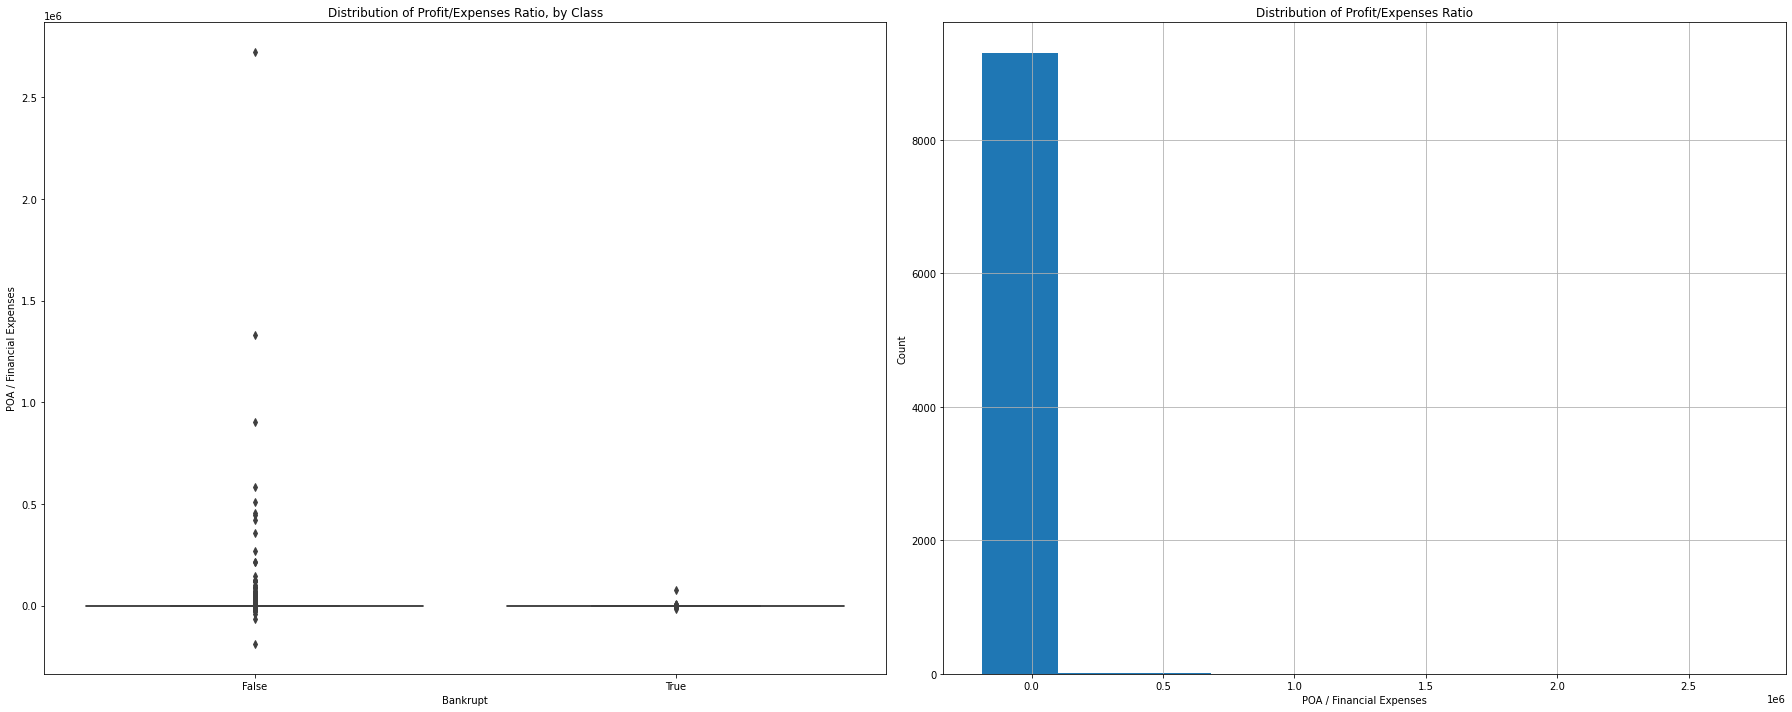

In [22]:
fig, ax = plt.subplots(figsize=(25,10),ncols=2)
sns.boxplot(x='bankrupt', y='feat_27', data=df, ax=ax[0])
ax[0].set_xlabel('Bankrupt')
ax[0].set_ylabel('POA / Financial Expenses')
ax[0].set_title('Distribution of Profit/Expenses Ratio, by Class')
df['feat_27'].hist(ax=ax[1])
ax[1].set_xlabel('POA / Financial Expenses')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Profit/Expenses Ratio')
fig.tight_layout();

### Feat_34: Expenses/Liabilities

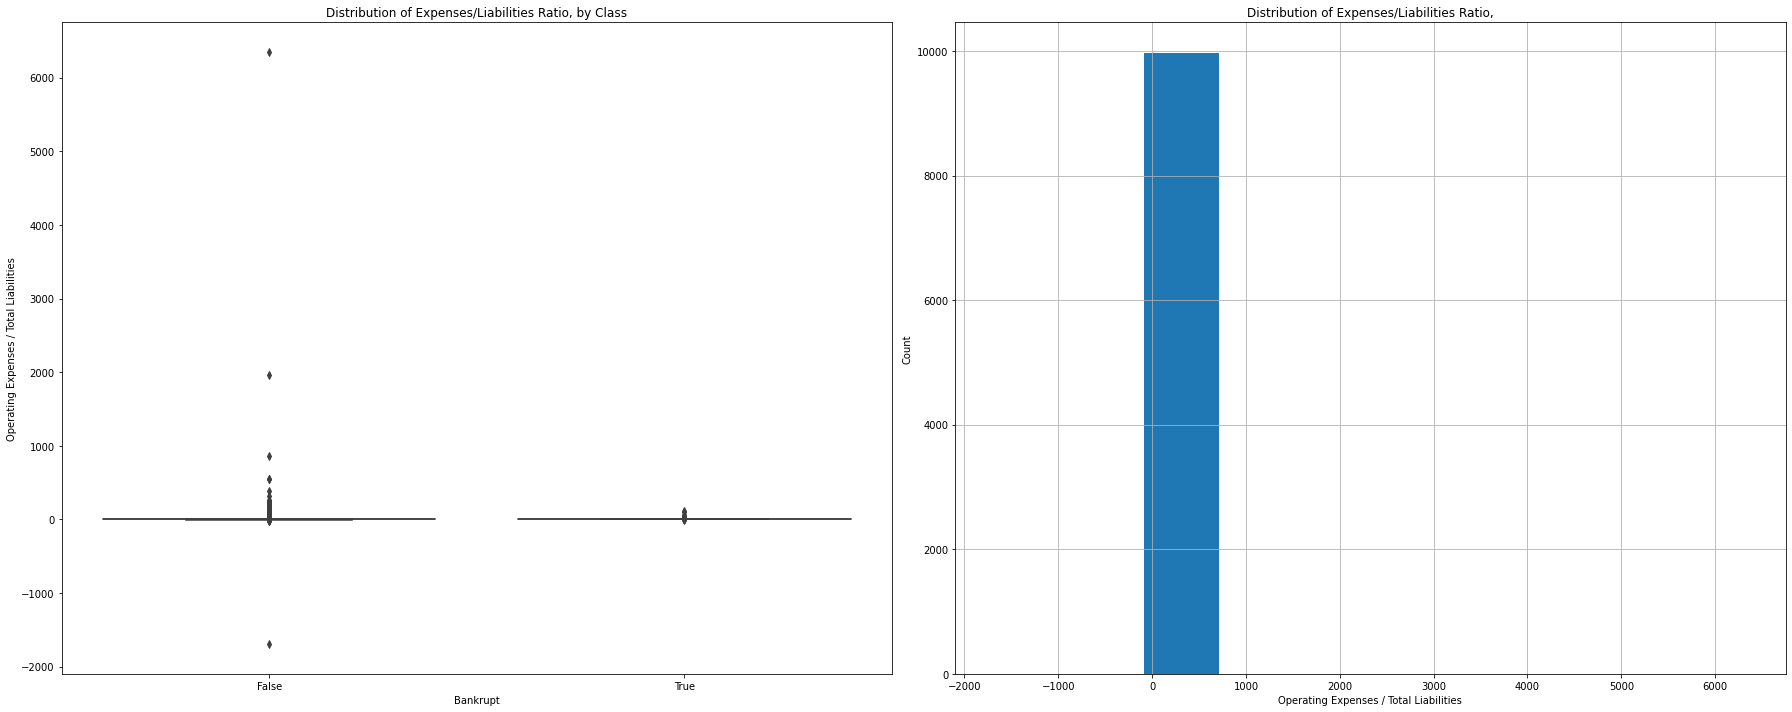

In [25]:
fig, ax = plt.subplots(figsize=(25,10),ncols=2)
sns.boxplot(x='bankrupt', y='feat_34', data=df, ax=ax[0])
ax[0].set_xlabel('Bankrupt')
ax[0].set_ylabel('Operating Expenses / Total Liabilities')
ax[0].set_title('Distribution of Expenses/Liabilities Ratio, by Class')
df['feat_34'].hist(ax=ax[1])
ax[1].set_xlabel('Operating Expenses / Total Liabilities')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Expenses/Liabilities Ratio,')
fig.tight_layout();

### Feat_2: Liabilities/Assets

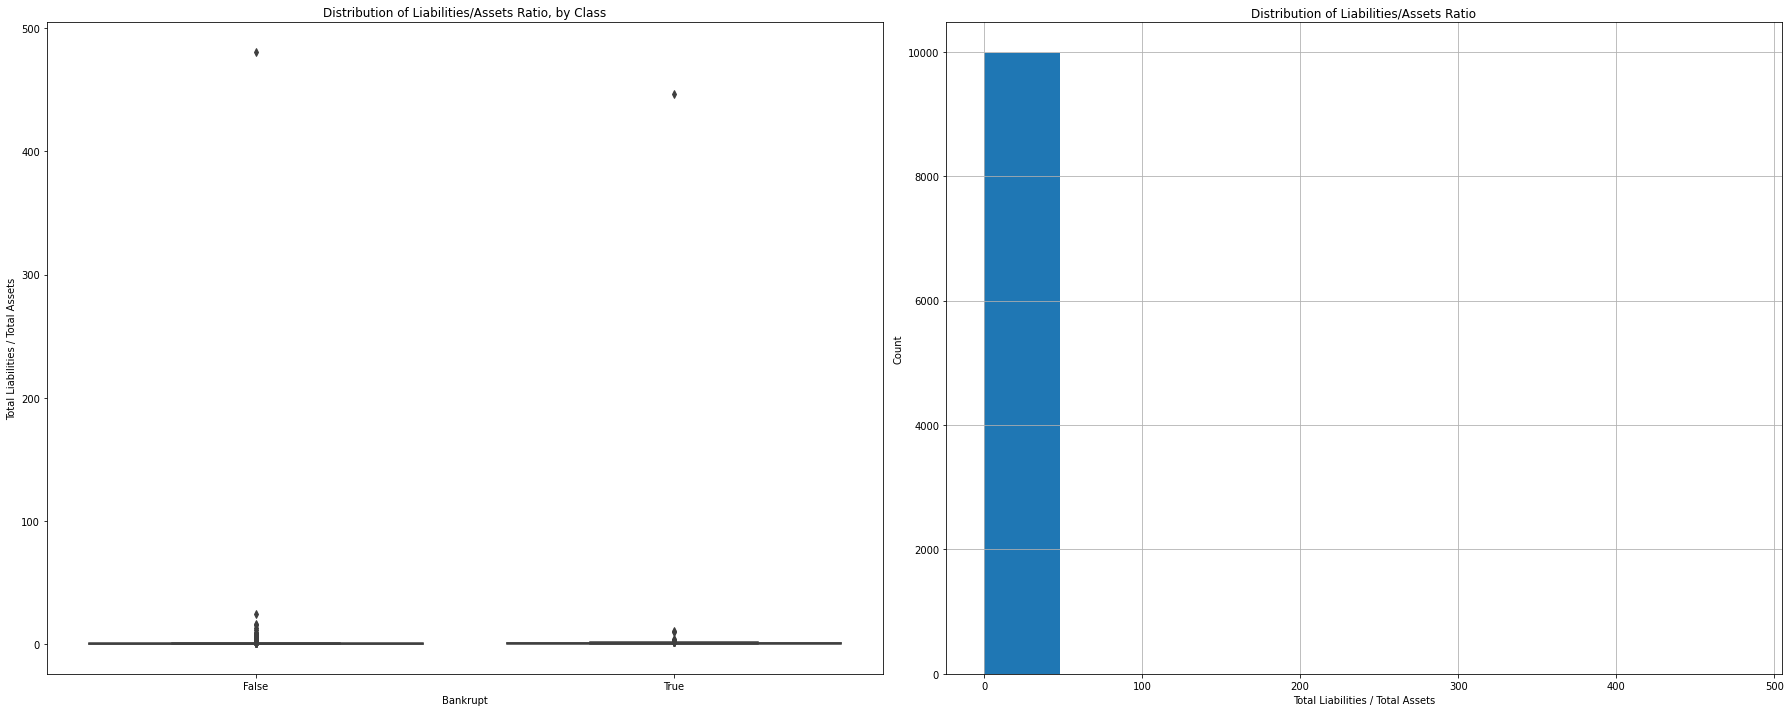

In [27]:
fig, ax = plt.subplots(figsize=(25,10),ncols=2)
sns.boxplot(x='bankrupt', y='feat_2', data=df, ax=ax[0])
ax[0].set_xlabel('Bankrupt')
ax[0].set_ylabel('Total Liabilities / Total Assets')
ax[0].set_title('Distribution of Liabilities/Assets Ratio, by Class')
df['feat_2'].hist(ax=ax[1])
ax[1].set_xlabel('Total Liabilities / Total Assets')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Liabilities/Assets Ratio')
fig.tight_layout();

The data seems to be heavily skewed, this will impact our model selection

Another important consideration for model selection is whether the data has the problem of multicolinearity.

<AxesSubplot:>

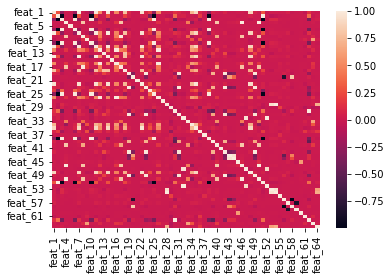

In [31]:
sns.heatmap(df.drop(columns='bankrupt').corr())

We can see that there are multicolinearity in several of our of features (white = positive corr, black = negative corr)

After a quick EAD, we can come to some conclusion:

- First, our data is imbalanced. This need to be tackled before model training

- Second, many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. 

- Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.